In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('iris_data.data',header=None)

In [4]:
df = pd.DataFrame(data)

# Exploratory data analysis

In [5]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.columns = ['SEPAL_LENGTH', 'SEPAL_WIDTH', 'PETAL_LENGTH', 'PETAL_WIDTH','TYPE']

In [7]:
df.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,TYPE
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df['TYPE'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df['TYPE'] = df['TYPE'].map({'Iris-setosa':0,
                             'Iris-versicolor':1,
                             'Iris-virginica':2})

In [10]:
df.head()


,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,TYPE
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.describe()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,TYPE
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEPAL_LENGTH  150 non-null    float64
 1   SEPAL_WIDTH   150 non-null    float64
 2   PETAL_LENGTH  150 non-null    float64
 3   PETAL_WIDTH   150 non-null    float64
 4   TYPE          150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Data visualization

array([[<Axes: title={'center': 'SEPAL_LENGTH'}>,
        <Axes: title={'center': 'SEPAL_WIDTH'}>],
       [<Axes: title={'center': 'PETAL_LENGTH'}>,
        <Axes: title={'center': 'PETAL_WIDTH'}>],
       [<Axes: title={'center': 'TYPE'}>, <Axes: >]], dtype=object)

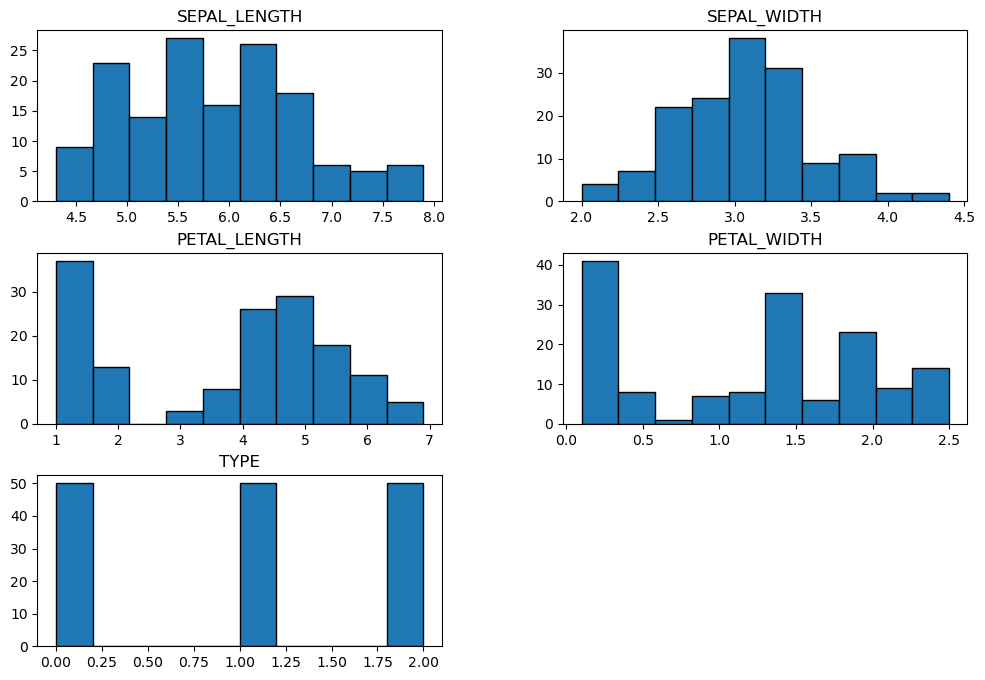

In [13]:
df.hist(edgecolor='Black',figsize=(12,8),grid=False)

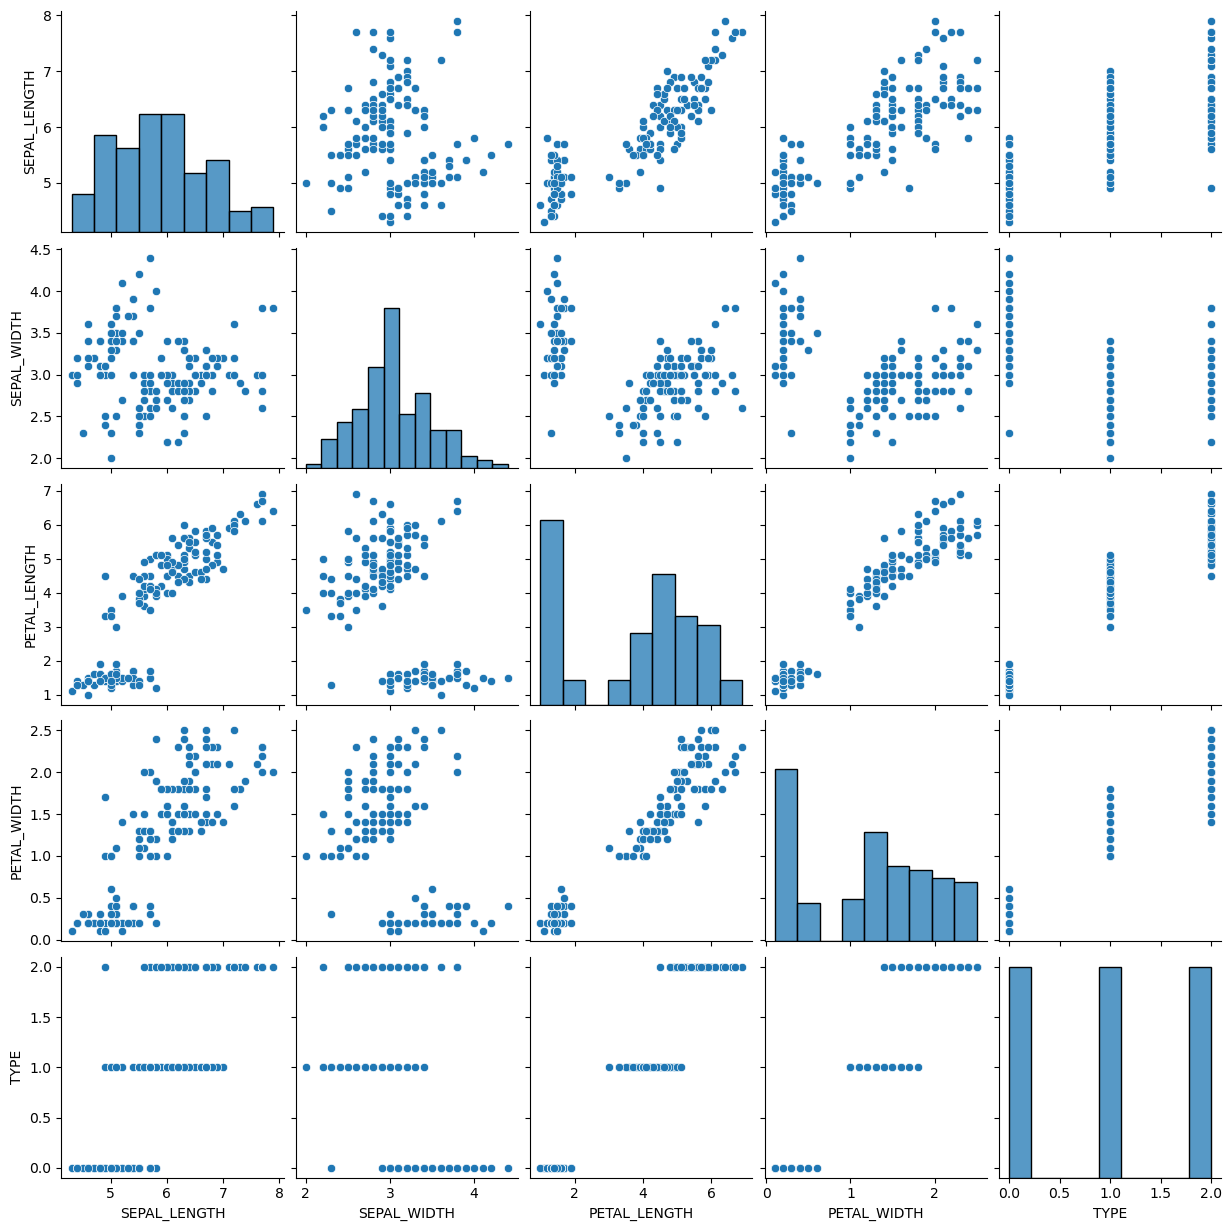

In [14]:
sns.pairplot(df)

In [15]:
df.keys()

Index(['SEPAL_LENGTH', 'SEPAL_WIDTH', 'PETAL_LENGTH', 'PETAL_WIDTH', 'TYPE'], dtype='object')

In [16]:
df['TYPE'].unique()

array([0, 1, 2], dtype=int64)

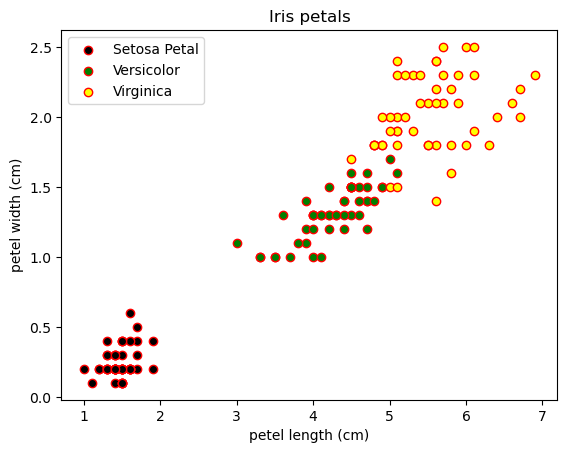

In [17]:
setosa = df[df.TYPE == 0]
versicolor = df[df.TYPE== 1]
virginica = df[df.TYPE== 2]

fig,axis = plt.subplots()

axis.scatter(setosa['PETAL_LENGTH'], setosa['PETAL_WIDTH'], label="Setosa Petal", facecolor="black",edgecolors='r')
axis.scatter(versicolor['PETAL_LENGTH'], versicolor['PETAL_WIDTH'], label="Versicolor", facecolor="green",edgecolors='r')
axis.scatter(virginica['PETAL_LENGTH'], virginica['PETAL_WIDTH'], label="Virginica", facecolor="yellow",edgecolors='r')

axis.set_xlabel("petel length (cm)")
axis.set_ylabel("petel width (cm)")
axis.set_title("Iris petals")
axis.legend()

# Modeling

In [18]:
from sklearn.model_selection import train_test_split
x = df.drop(['SEPAL_LENGTH', 'SEPAL_WIDTH', 'TYPE'], axis=1)
y = df['TYPE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


# Using Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

# Performance Measurement of Logistic Regression

In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy using Decision Tree Classifier :", accuracy_score(y_test, y_pred1)*100)

Accuracy using Decision Tree Classifier : 100.0


In [21]:
from sklearn.metrics import r2_score
print('R2_score of this model is:',r2_score(y_test,y_pred1)*100)

R2_score of this model is: 100.0


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Using Decision Tree Classifier

In [23]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

In [24]:
Xv = x.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

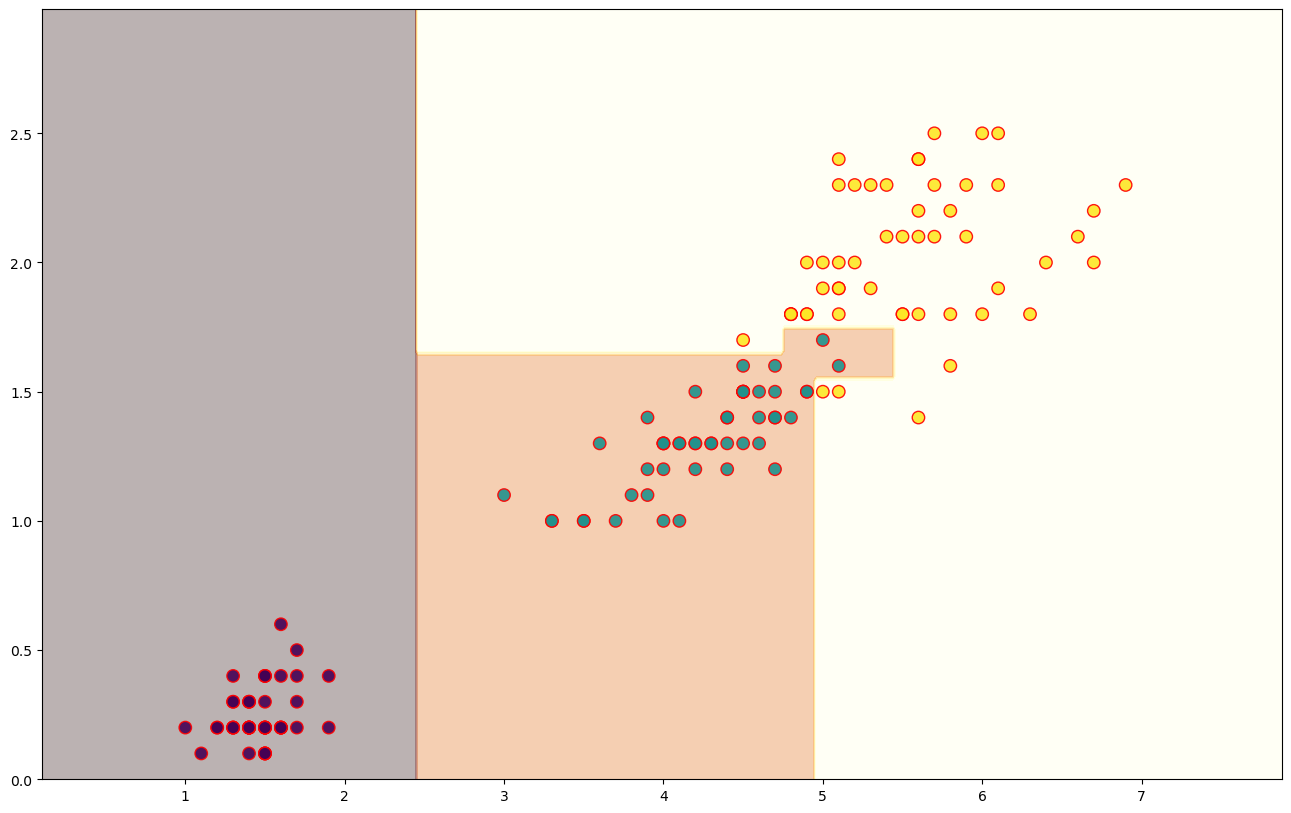

In [25]:
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(x.values[:, 0], x.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='r');

In [26]:
df

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,TYPE
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Performance measurement

In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy using Decision Tree Classifier :", accuracy_score(y_test, y_test_pred)*100)

Accuracy using Decision Tree Classifier : 100.0


In [29]:
from sklearn.metrics import r2_score
print('R2_score of this model is:',r2_score(y_test,y_test_pred)*100)

R2_score of this model is: 100.0


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Using grid search

In [31]:
param_grid = {
    'criterion':["gini", "entropy", "log_loss"],
    'splitter':["best", "random"],
    'max_depth':[None, 1, 5, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2']
}

In [32]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), param_grid, cv=5, verbose=1)

In [33]:
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'splitter': ['best', 'random']},
             verbose=1)

In [34]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'random'}

In [35]:
model2 = tree.DecisionTreeClassifier(
    criterion = best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

In [36]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=4,
                       random_state=42)

# Performance measurement after grid search

In [37]:
pred = model2.predict(x_test)
print("Accuracy using Decision Tree Classifier :", accuracy_score(y_test, y_test_pred)*100)

Accuracy using Decision Tree Classifier : 100.0


In [38]:
from sklearn.metrics import r2_score
print('R2_score of this model is:',r2_score(y_test,y_test_pred)*100)

R2_score of this model is: 100.0


In [39]:
from sklearn.metrics import mean_squared_error
print('mean squared error is:', mean_squared_error(y_test, y_test_pred))

mean squared error is: 0.0


# Predicting type of flower from input data

In [40]:
x = input('Enter petal length')
y = input('Enter petal width')
value = model2.predict([[x, y]])
list = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
list[int(value)]


Enter petal length1
Enter petal width2


'Iris-setosa'